## What is Regression in Machine Learning?
Regression is a supervised machine learning technique used when the target variable (the output we want to predict) is continuous (numeric) rather than categorical.

It is about finding the relationship (mathematical function) between:

- `Independent Variables` (features, predictors, inputs, X): e.g., size of house, number of bedrooms, years of experience.
- `Dependent Variable` (target, output, Y): e.g., price of house, employee salary.

### Examples of Regression Problems

#### 1. House Price Prediction

- Input: Size (sq. ft), number of rooms, location.
- Output: House price in dollars.

#### 2. Stock Market Prediction

- Input: Previous stock prices, trading volume.
- Output: Next-day stock price.

#### 3. Medical Use Case

- Input: Age, BMI, blood pressure.
- Output: Patient’s blood sugar level.

#### 4. Weather Forecasting

- Input: Humidity, wind speed, past temperature.
- Output: Tomorrow’s temperature.

### Types of Regression Models
#### 1. Simple Linear Regression

Assumes a linear relationship between input and output.

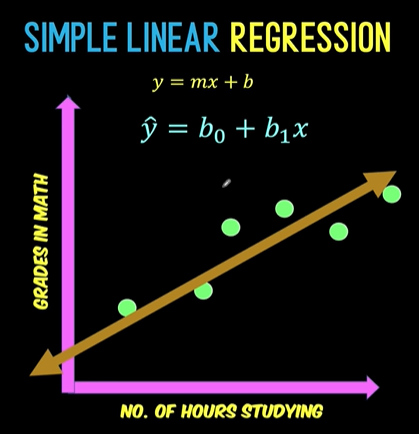 | 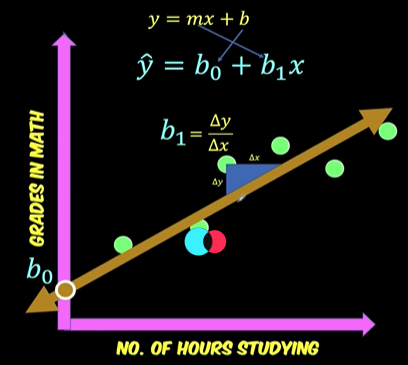

<table>
<tr>
<td>

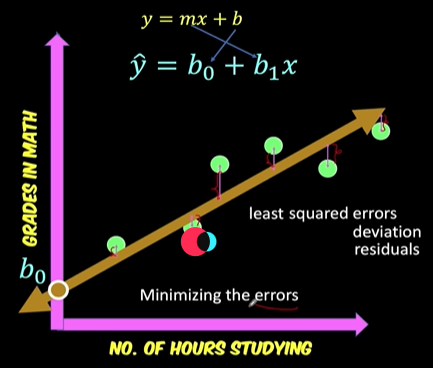

</td>
<td>

### Why “Squared”?
- If we just summed raw errors, **positive and negative would cancel out**.  
- **Squaring ensures all errors are positive.**  
- Also, squaring **penalizes larger errors more strongly**.  

</td>
</tr>
</table>


Least Squared Error is the method linear regression uses to find the best-fitting line by minimizing the sum of squared differences between actual and predicted values.

Equation: 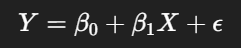

Where:

- Y = predicted output
- 𝛽0 = intercept (where the line crosses the y-axis)
- 𝛽1 = slope of the line/weight of the feature
- ϵ = error term



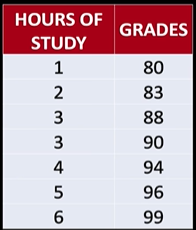 | 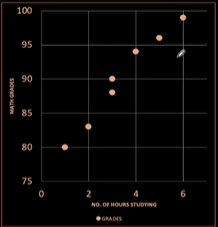 | 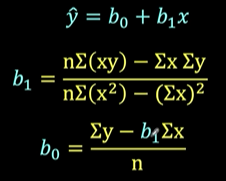

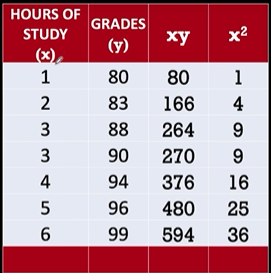 

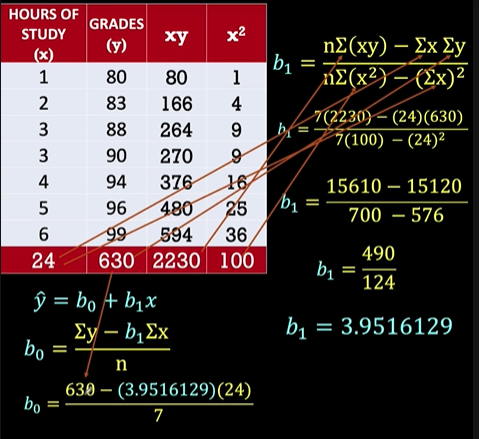 | 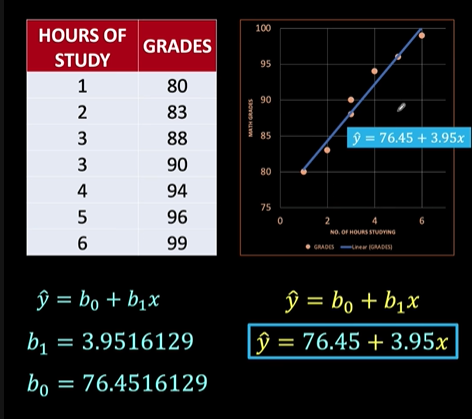

### How Linear regression works

| 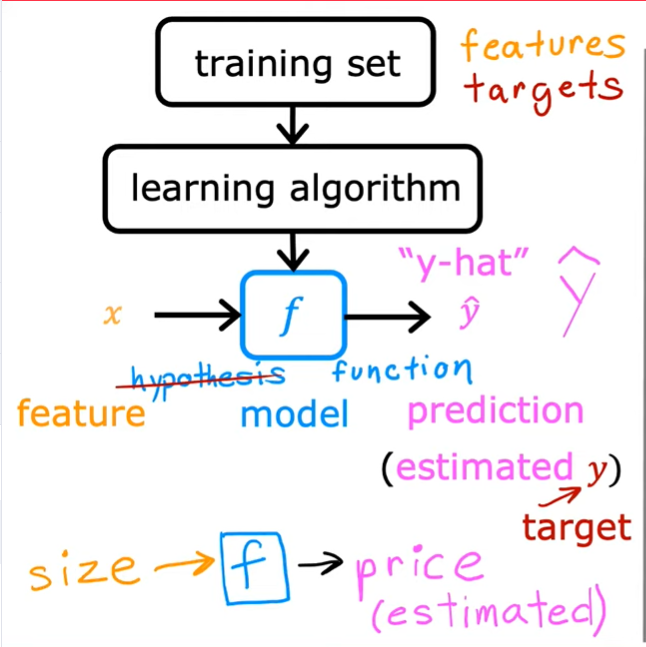 | 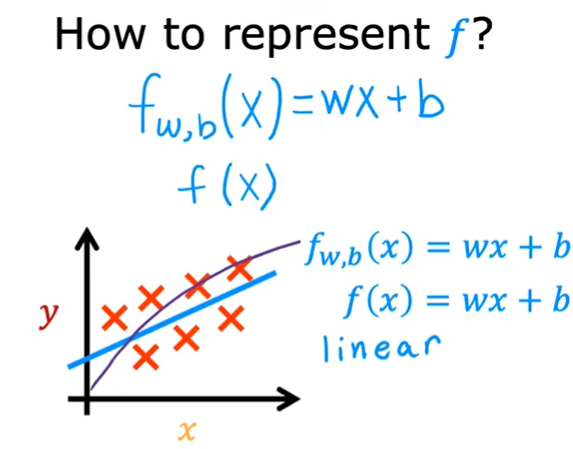 | 
|-----------------------------------|----------------------------------------|

### Cost Function

A `cost function` (also called a loss function) measures how well a machine learning model is performing.

- It calculates the difference between the actual values (from the dataset) and the predicted values (from the model).
- The goal of training is to minimize this cost so the predictions get as close as possible to reality.

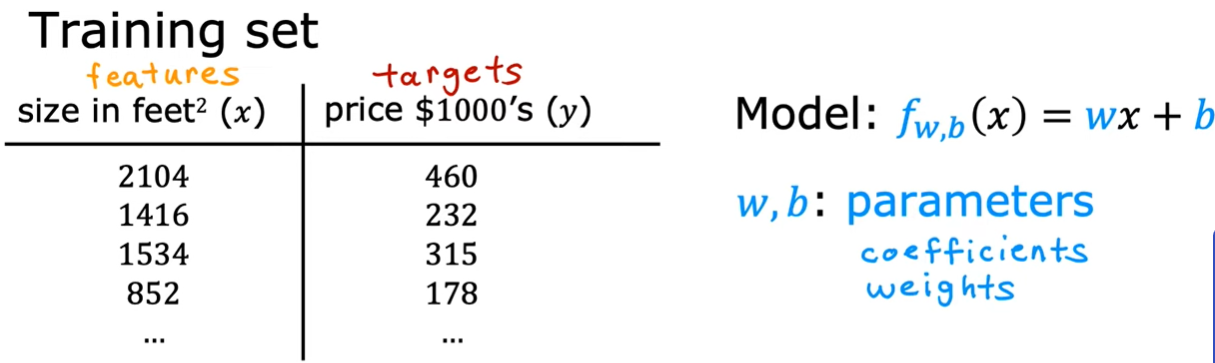




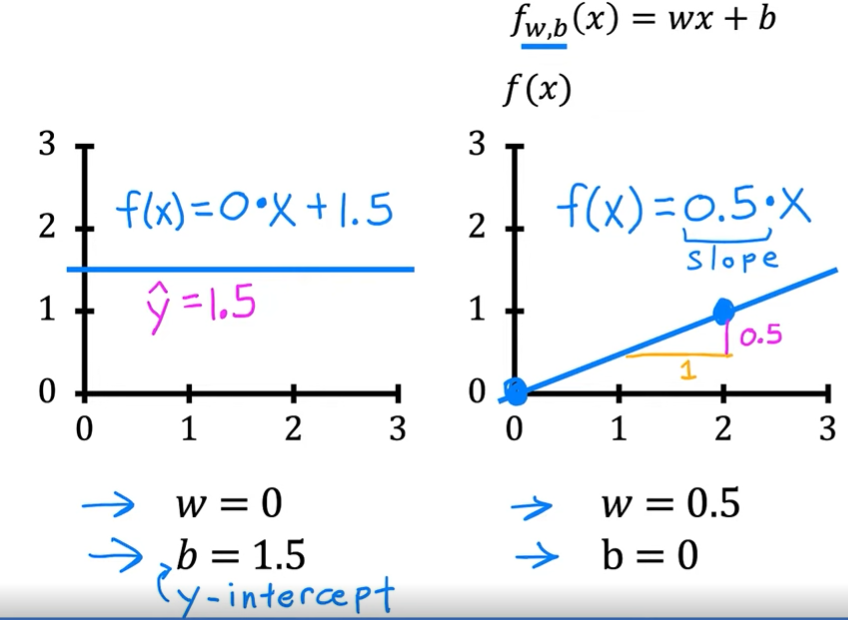

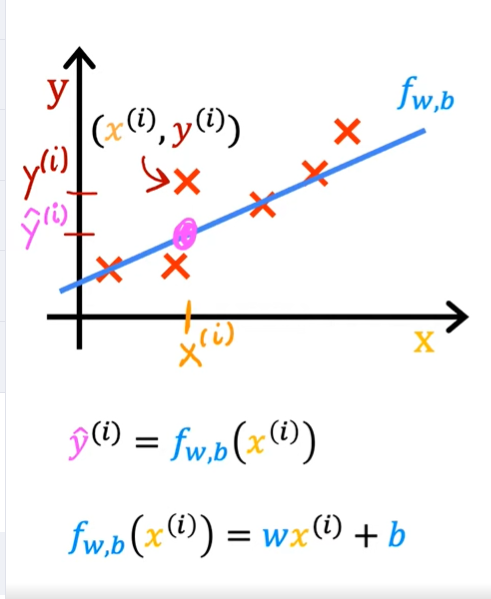

#### import libraries


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# Load the dataset
df = pd.read_csv("Salary_dataset.csv")

# Display first rows
print(df.head())


   Unnamed: 0  YearsExperience   Salary
0           0              1.2  39344.0
1           1              1.4  46206.0
2           2              1.6  37732.0
3           3              2.1  43526.0
4           4              2.3  39892.0


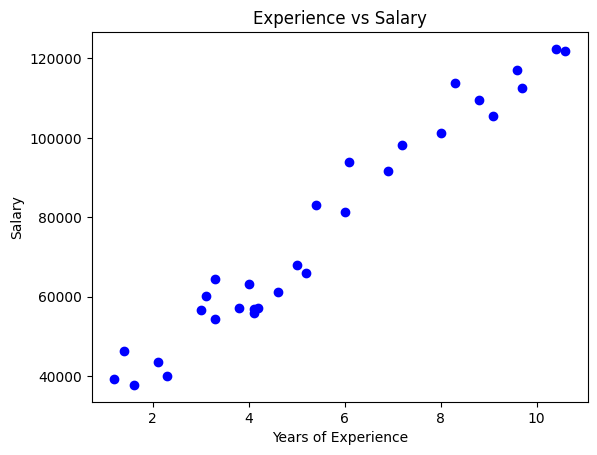

In [ ]:
# visualize the data
plt.scatter(df['YearsExperience'], df['Salary'], color='blue')
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Experience vs Salary")
plt.show()

In [ ]:
# spli the data into features and target
X = df[['YearsExperience']]  # Independent variable
y = df['Salary']             # Dependent variable

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [6]:
# train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

print("Intercept (β0):", model.intercept_)
print("Slope (β1):", model.coef_[0])


Intercept (β0): 24380.20147947369
Slope (β1): 9423.81532303098


In [7]:
# make predictions
y_pred = model.predict(X_test)

# Compare actual vs predicted
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison.head())


      Actual      Predicted
27  112636.0  115791.210113
15   67939.0   71499.278095
23  113813.0  102597.868661
17   83089.0   75268.804224
8    64446.0   55478.792045


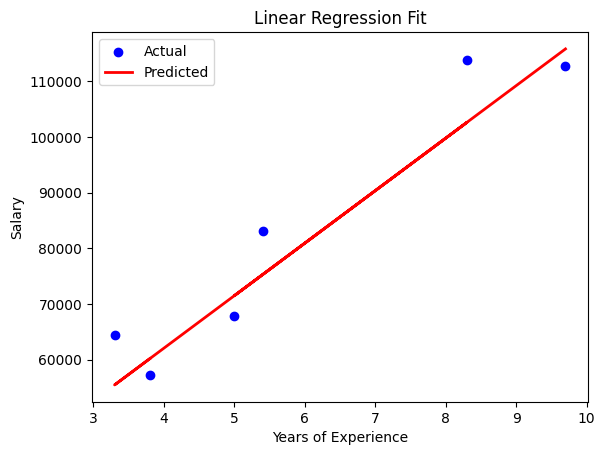

In [8]:
plt.scatter(X_test, y_test, color='blue', label="Actual")
plt.plot(X_test, y_pred, color='red', linewidth=2, label="Predicted")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Linear Regression Fit")
plt.legend()
plt.show()


## Multiple Linear Regression (MLR)

Multiple Linear Regression is a supervised learning algorithm used to predict a **continuous variable** using **two or more predictors (independent variables)**.  

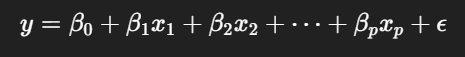

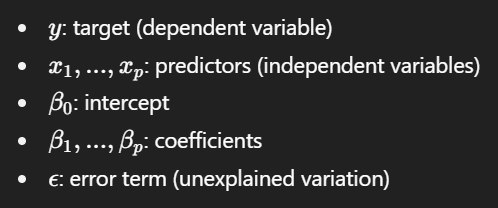

---

### 2. Coefficients in Multiple Linear Regression
Coefficients (β) are the `weights` the model learns. They tell us:

- **Direction (positive/negative effect):**  
  - Positive → an increase in the feature increases \(y\).  
  - Negative → an increase in the feature decreases \(y\).  

- **Magnitude:**  
  - Large coefficient → strong effect.  
  - Small coefficient → weak effect.  

**Example (House Price Prediction):**  

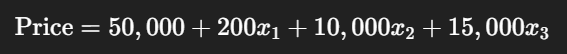

- \(200\): Each additional sq. ft. increases price by \$200 (holding bedrooms & location constant).  
- \(10,000\): Each extra bedroom adds \$10,000.  
- \(15,000\): A better location score adds \$15,000.  

**Key detail:** In multiple regression, coefficients show the effect of **one variable while keeping others constant**.  

### 3. Variance & Variability in MLR
In regression, variability tells us **how much the data is spread out and how well the model explains it**.  

We split variance into parts:  

#### (a) Total Variability (SST)  - Total sum of squares
How much \(y\) varies around its mean:  

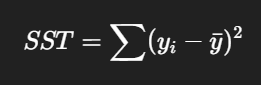

#### (b) Explained Variability (SSR)  - Regression sum of squares
How much of that variability is explained by the regression model:  

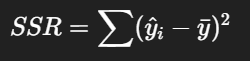

#### (c) Unexplained Variability (SSE)  - Sum of Squared Errors
The error left after regression (residuals):  

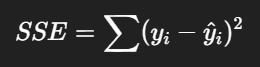 

Relationship:  

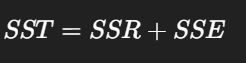


### 4. Connection to \(R^2\)
The proportion of variability explained by the model:  

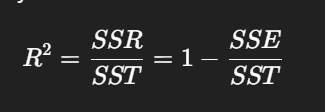

- (R^2 = 0.8\) → Model explains 80% of the variance in \(y\).  
- **Adjusted \(R^2\)** corrects for number of predictors (penalizes unnecessary features).  

### 5. Variance of the Coefficients
Each coefficient has its own **variance (uncertainty):**  

- A **large variance** → coefficient is unstable (sensitive to new data).  
- A **small variance** → coefficient is reliable.  

We use this to compute **standard errors**, **confidence intervals**, and **p-values** to test if coefficients are statistically significant.  

### 6. Assumptions
For coefficients and variance to be valid, we assume:  
1. **Linearity** – relationship between predictors & outcome is linear.  
2. **Independence** – observations are independent.  
3. **Homoscedasticity** – errors have constant variance.  
4. **Normality** – errors are normally distributed.  
5. **No Multicollinearity** – predictors are not too correlated.  

### Summary
- **Coefficients** show how much each predictor affects the target (while holding others constant).  
- **Variance** measures both (1) the variability in \(y\) (explained vs unexplained) and (2) the uncertainty in the coefficients themselves.  
- Together, they tell us **how well the model fits** and **how reliable the feature effects are**.  
